<a href="https://colab.research.google.com/github/Lugiax/covidABM/blob/master/libreta_de_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!rm -r modulos
!git clone https://github.com/Lugiax/covidABM.git modulos
!pip install mesa

Cloning into 'modulos'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 205 (delta 86), reused 188 (delta 72), pack-reused 0
Receiving objects: 100% (205/205), 18.12 MiB | 20.59 MiB/s, done.
Resolving deltas: 100% (86/86), done.


#Modelo 1

In [2]:
%matplotlib inline
from modulos.Ambiente.ambiente import Ciudad
from modulos.Individuos.individuo import Individuo_2

ImportError: ignored

In [0]:
from mesa import Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from random import choices, seed
from math import sqrt
seed(920204)

class Modelo(Model):
    #Algunas constantes
    SUCEPTIBLE = 0
    EXPUESTO = 1
    INFECTADO = 2
    RECUPERADO = 3
    salud_to_str={0:'Suceptible', 1:'Expuesto', 2:'Infectado', 3:'Recuperado'}
    pp_dia = 1 ## Son los pasos dados por dia simulado

    def __init__(self, N, city_object, agent_object, ind_attrs):
        super().__init__()
        self.num_ind = N
        self.city_object = city_object
        self.agent_object = agent_object
        self.ind_attrs = ind_attrs
        self.schedule = RandomActivation(self)
        self.generar_espacio()
        
        ## Se define el grid que se representará en la 
        self.grid = self.ciudad.nodes['ciudad']['espacio']
        self.datacollector = DataCollector(
            model_reporters = {'Suceptibles': self.conteo_func(self.SUCEPTIBLE),
                               'Expuestos': self.conteo_func(self.EXPUESTO),
                               'Infectados': self.conteo_func(self.INFECTADO),
                               'Recuperados': self.conteo_func(self.RECUPERADO)})
        self.conteo_instantaneo = [0,0,0,0]
    
    def generar_espacio(self):
        self.ciudad = self.city_object(self, self.agent_object)
        
        for ind in self.ciudad.generar_individuos(self.ind_attrs):
            self.schedule.add(ind)
        
        #Se crea el espacio donde estarán los individuos
        self.ciudad.crear_nodo('ciudad', tipo='ciudad',
                               ocupantes = self.ciudad.agentes_a_asignar,
                               tamano=110)
        
        #Se planta un infectado en la simulación
        for ind in choices(self.schedule.agents, k = 5):
            ind.salud = self.INFECTADO
            ind.asintomatico = False      

    
    def step(self):
        self.conteo()
        self.datacollector.collect(self)
        self.schedule.step()

    
    def conteo(self):
        #Una función para contar los casos actuales en la ciudad
        self.conteo_instantaneo = [0,0,0,0]
        for a in self.schedule.agents:
            self.conteo_instantaneo[a.salud] += 1
        return self.conteo_instantaneo

    def conteo_func(self, tipo):
        def contar(modelo):
            return modelo.conteo_instantaneo[tipo]
        return contar
    
    def correr(self, n_steps):
        bloques = int(n_steps*0.1)
        for i in range(n_steps):
            self.step()
            if int(i%bloques) == 0:
                print('%d%% ... '%(int(i/n_steps*100)), end = '')
        print('100%')


0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


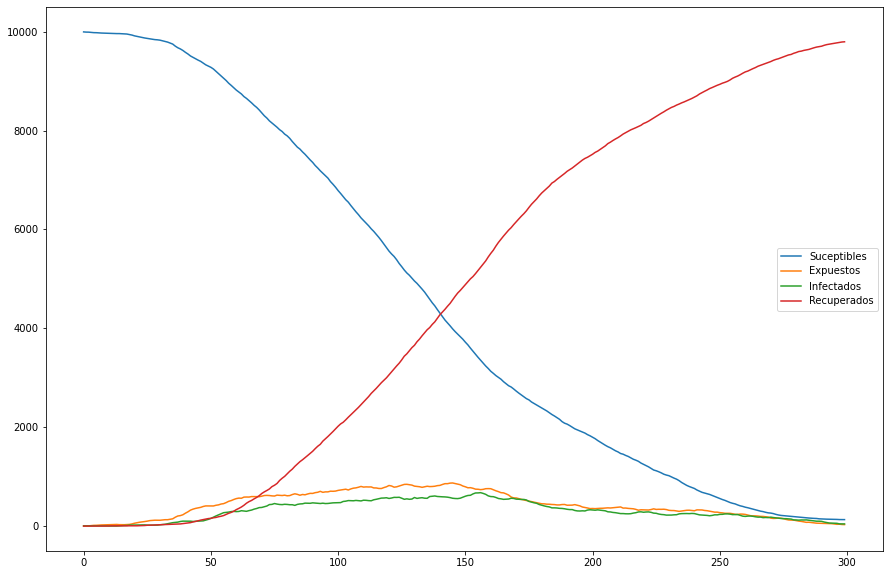

In [0]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 300

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 0,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


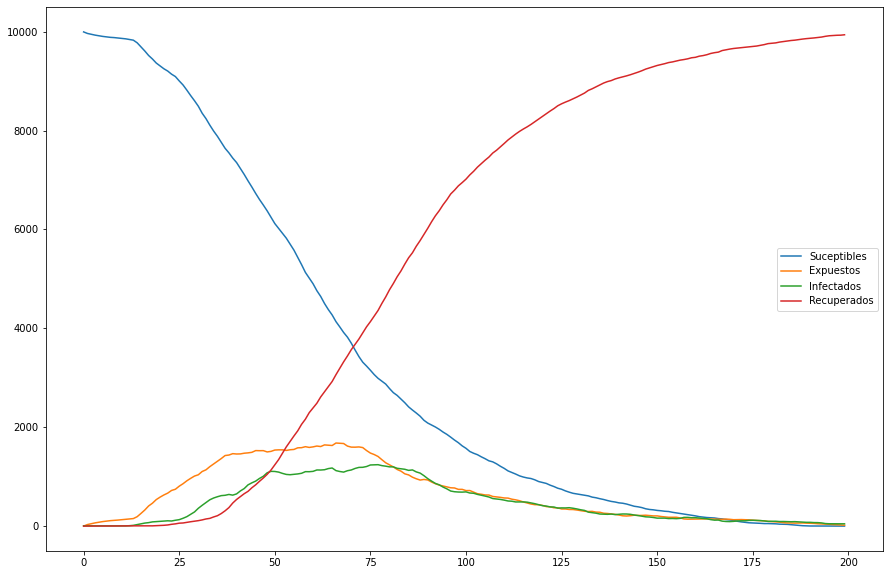

In [0]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


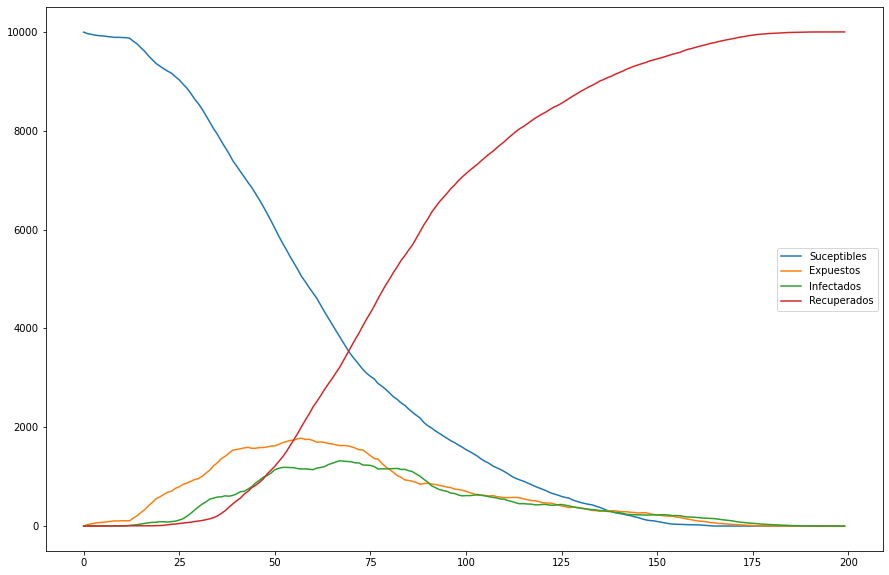

In [0]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': True,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


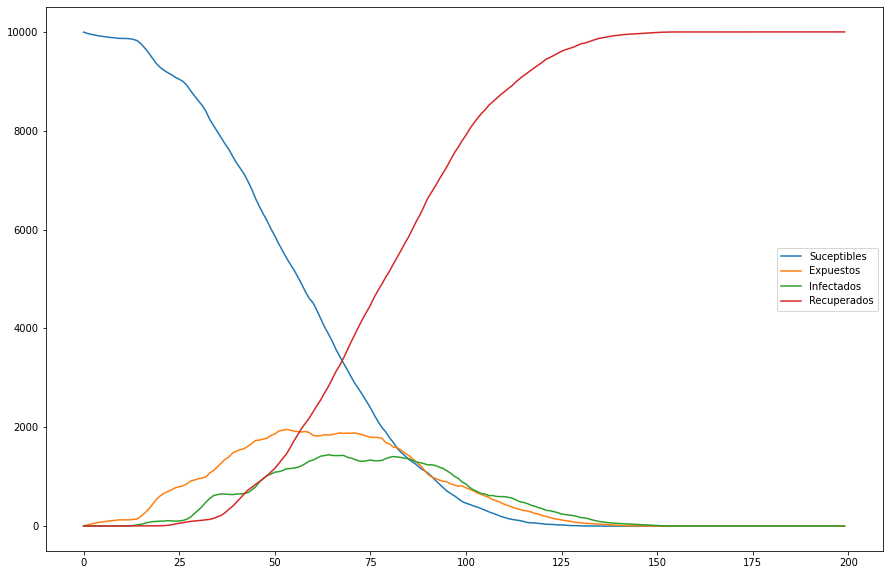

In [0]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':True,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


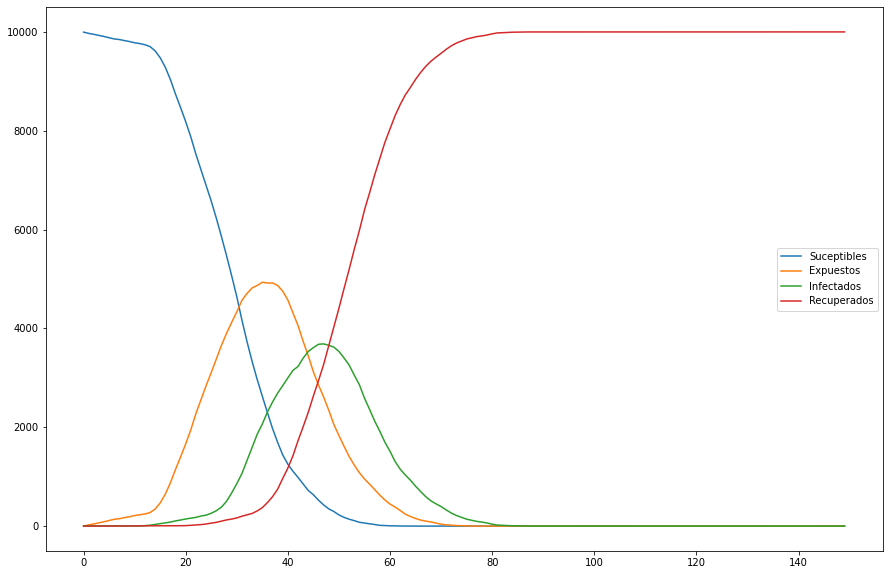

In [0]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 150

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 3,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

# Modelo 2

In [0]:
%matplotlib inline
from modulos.Ambiente.ambiente import Mundo
from modulos.Individuos.individuo import Individuo_2

In [0]:
from mesa import Model
from mesa.visualization.modules import CanvasGrid, ChartModule
from mesa.visualization.ModularVisualization import ModularServer
from mesa.datacollection import DataCollector
from mesa.time import RandomActivation
from collections import OrderedDict
from random import choices, shuffle
from math import sqrt
import pickle as pk
import numpy as np

class Modelo(Model):
    #Algunas constantes
    SUCEPTIBLE = 0
    EXPUESTO = 1
    INFECTADO = 2
    RECUPERADO = 3
    salud_to_str={0:'Suceptible', 1:'Expuesto', 2:'Infectado', 3:'Recuperado'}
    pp_dia = 1 ## Son los pasos dados por dia simulado
    def __init__(self,world_object, agent_object, params, ind_attrs):
        super().__init__()
        self.params = params
        self.mundo = world_object(self,agent_object)
        self.ind_attrs = ind_attrs
        self.schedule = RandomActivation(self)
        self.generar_regiones()
        self.n_paso = 0
        
        ## Se define el grid que se representarÃ¡ en la 
        #self.grid = self.ciudad.nodes['ciudad']['espacio']
        model_reporters = {'Suceptibles': self.conteo_func(self.SUCEPTIBLE),
                            'Expuestos': self.conteo_func(self.EXPUESTO),
                            'Infectados': self.conteo_func(self.INFECTADO),
                            'Recuperados': self.conteo_func(self.RECUPERADO)}
        reg_reporters = {k: self.conteo_por_reg(k) for k in self.regiones}
        self.datacollector = DataCollector({**model_reporters, **reg_reporters})
        self.conteo_instantaneo = self.conteo()
    
    def generar_regiones(self):
        datos = self.leer_regiones('modulos/Datos/datos.pk')
        conexiones = self.generar_lista_de_aristas('modulos/Datos/adyacencia.pk',
                                                   list(datos.keys()))
        infectados = self.obtener_infectados('modulos/Datos/infectados.csv',
                                             list(datos.keys()))
        ids_start=0
        self.regiones = {}
        for region in datos:
            #if region not in seleccionadas: continue
            self.regiones[region] = datos[region]
            tamano = self.params['area']
            pob = self.regiones[region]['pob']//self.params['inds_x_agente']
            ids = [i for i in range(ids_start, ids_start+pob)]
            ids_start += pob
            individuos = self.mundo.generar_individuos(pob,
                                                       ids = ids,
                                                       attrs= self.ind_attrs)
            n_infectados = infectados[region] if infectados.get(region, None) is not None else 0
            print(f'{region}: {pob} agentes, {n_infectados} infectados')
            for ind in individuos:
                if n_infectados>0:
                    ind.salud = self.INFECTADO
                    n_infectados -= 1
                    
                self.schedule.add(ind)
            
            self.mundo.crear_nodo(region, 'region',
                                  ocupantes = individuos,
                                  tamano = tamano,
                                  ind_pos_def = 'aleatorio'
                                  )
        print('Se crean las aristas')
        self.mundo.add_weighted_edges_from(conexiones, weight = 'peso')
        posiciones = {k: list(self.regiones[k]['centro'])[::-1] for k in self.regiones}
        #self.mundo.visualizar(pos = posiciones, with_labels = True)
        

    def norm_coord(self, coord):
        coord = np.array(coord)
        esq1 = np.array([21.670833, -90.621414])
        esq2 = np.array([19.546208, -87.449881])
        delta = esq2-esq1
        return (coord-esq1)/delta
        
    
    def obtener_rectangulo(self, regiones):
        latlim = [-1e100, 1e100]
        lonlim = [-1e100, 1e100]
        for region in regiones:
            print(region)
            for coord in regiones[region]['limites'][0]:
                latlim = [min(latlim[0], coord[0]), max(latlim[1], coord[0])]
                lonlim = [min(lonlim[0], coord[1]), max(lonlim[1], coord[1])]
        return latlim, lonlim
   
    def conteo(self):
        #Una funciÃ³n para contar los casos actuales en la ciudad
        self.conteo_instantaneo = [0,0,0,0]
        for a in self.schedule.agents:
            self.conteo_instantaneo[a.salud] += 1
        return self.conteo_instantaneo

    def conteo_func(self, tipo):
        def contar(modelo):
            return modelo.conteo_instantaneo[tipo]
        return contar
    
    def conteo_por_reg(self, reg):
        def contar(modelo):
            ags = modelo.mundo.obtener_agentes_en_nodo(reg)
            conteo = [0,0,0,0]
            for a in ags:
                conteo[a.salud]+=1
            return conteo
        return contar

    def leer_regiones(self,path):
        with open(path, 'rb') as f:
            datos = pk.load(f)
        return datos
    
    def generar_lista_de_aristas(self, path, regiones):
        conexiones = []
        with open(path, 'rb') as f:
            datos = pk.load(f)
            assert len(datos)==len(regiones), f'{len(datos)}!={len(regiones)}'
            a_agregar=[]
            for region in datos:                
                a_agregar = [(region, nueva, peso)\
                               for nueva, peso in datos[region]]
                conexiones.extend(a_agregar)
        return conexiones
    
    def obtener_infectados(self, path, regiones):
        infectados = {}
        with open(path, 'r') as f:
            for line in f.readlines()[4:]:
                datos= line.split(',')
                if datos[1] not in regiones:
                    print(f'{datos[1]} no está en regiones')
                else:
                    infectados[datos[1]] = int(datos[5])
        return infectados
                
    def step(self):
        self.momento = self.n_paso % self.pp_dia #es el momento del dia
        self.conteo()
        self.datacollector.collect(self)
        self.schedule.step()
        self.n_paso += 1
        
        
    def correr(self, n_steps):
        bloques = int(n_steps*0.1)
        print('---- Corriendo simulación ----')
        for i in range(n_steps):
            self.step()
            if int(i%bloques) == 0:
                print('%d%% ... '%(int(i/n_steps*100)), end = '')
        print('100%')


Abalá: 635 agentes, 0 infectados
Acanceh: 1533 agentes, 1 infectados
Akil: 1036 agentes, 0 infectados
Baca: 570 agentes, 1 infectados
Bokobá: 205 agentes, 0 infectados
Buctzotz: 863 agentes, 1 infectados
Cacalchén: 681 agentes, 1 infectados
Calotmul: 409 agentes, 0 infectados
Cansahcab: 469 agentes, 0 infectados
Cantamayec: 240 agentes, 0 infectados
Celestún: 683 agentes, 0 infectados
Cenotillo: 370 agentes, 0 infectados
Chacsinkín: 281 agentes, 0 infectados
Chankom: 446 agentes, 0 infectados
Chapab: 303 agentes, 0 infectados
Chemax: 3349 agentes, 0 infectados
Chichimilá: 795 agentes, 1 infectados
Chicxulub Pueblo: 411 agentes, 0 infectados
Chikindzonot: 416 agentes, 3 infectados
Chocholá: 453 agentes, 4 infectados
Chumayel: 314 agentes, 1 infectados
Conkal: 914 agentes, 2 infectados
Cuncunul: 159 agentes, 0 infectados
Cuzamá: 496 agentes, 0 infectados
Dzan: 494 agentes, 0 infectados
Dzemul: 348 agentes, 0 infectados
Dzidzantún: 813 agentes, 0 infectados
Dzilam González: 590 agentes, 0

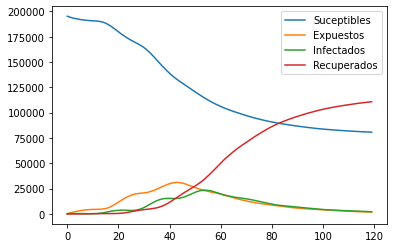

In [12]:
attrs_individuos = {#De comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos': False,
                    'distancia_paso': 1,
                    'prob_movimiento':0.5,
                    'prob_mov_nodos':0.1,
                    'activar_cuarentena': False,
                    'quedate_en_casa': False,
                    #Ante la enfermedad
                    'prob_contagiar': 0.2,
                    'prob_infectarse': 0.1,
                    'radio_de_infeccion': 1
                    }
modelo_params = {
                    'area':50,
                    'inds_x_agente':10
                }
modelo = Modelo(Mundo, Individuo_2,
                modelo_params,
                attrs_individuos)

modelo.correr(120)
data = modelo.datacollector.get_model_vars_dataframe()
data.to_pickle('corrida1.pk')
data[['Suceptibles', 'Expuestos', 'Infectados', 'Recuperados']].plot()

Abalá: 635 agentes, 0 infectados
Acanceh: 1533 agentes, 1 infectados
Akil: 1036 agentes, 0 infectados
Baca: 570 agentes, 1 infectados
Bokobá: 205 agentes, 0 infectados
Buctzotz: 863 agentes, 1 infectados
Cacalchén: 681 agentes, 1 infectados
Calotmul: 409 agentes, 0 infectados
Cansahcab: 469 agentes, 0 infectados
Cantamayec: 240 agentes, 0 infectados
Celestún: 683 agentes, 0 infectados
Cenotillo: 370 agentes, 0 infectados
Chacsinkín: 281 agentes, 0 infectados
Chankom: 446 agentes, 0 infectados
Chapab: 303 agentes, 0 infectados
Chemax: 3349 agentes, 0 infectados
Chichimilá: 795 agentes, 1 infectados
Chicxulub Pueblo: 411 agentes, 0 infectados
Chikindzonot: 416 agentes, 3 infectados
Chocholá: 453 agentes, 4 infectados
Chumayel: 314 agentes, 1 infectados
Conkal: 914 agentes, 2 infectados
Cuncunul: 159 agentes, 0 infectados
Cuzamá: 496 agentes, 0 infectados
Dzan: 494 agentes, 0 infectados
Dzemul: 348 agentes, 0 infectados
Dzidzantún: 813 agentes, 0 infectados
Dzilam González: 590 agentes, 0

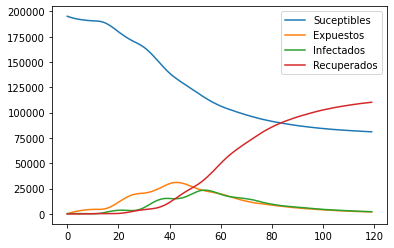

In [13]:
attrs_individuos = {#De comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos': False,
                    'distancia_paso': 1,
                    'prob_movimiento':0.5,
                    'prob_mov_nodos':0.1,
                    'activar_cuarentena': False,
                    'quedate_en_casa': False,
                    #Ante la enfermedad
                    'prob_contagiar': 0.2,
                    'prob_infectarse': 0.1,
                    'radio_de_infeccion': 1
                    }
modelo_params = {
                    'area':50,
                    'inds_x_agente':10
                }
modelo = Modelo(Mundo, Individuo_2,
                modelo_params,
                attrs_individuos)

modelo.correr(120)
data = modelo.datacollector.get_model_vars_dataframe()
data.to_pickle('corrida3.pk')
data[['Suceptibles', 'Expuestos', 'Infectados', 'Recuperados']].plot()